### Detecting the objects in an image along with the detection confidence using the pretrained Yolo v3 model.

In [27]:
# Importing required libraries:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [191]:
# Reading the deep learning Network by giving the pretrained model weights and the model configuration as parameters:

net=cv2.dnn.readNet("yolov3.weights","yolov3.cfg")

In [192]:
# Using Coco, a large scale dataset which consists of 80 classes to label the objects in an image:

with open("coco.names","r") as f:
    classes=[i.strip() for i in f.readlines()]

In [193]:
# Output layers of Yolo v3:

output=net.getUnconnectedOutLayersNames()

In [194]:
# Different colored boxes for different objects:

colors=np.random.uniform(0,255,size=(len(classes),3))

### Image 1:

In [195]:
# Loading an image:

img1=cv2.imread("img1.jpg")
height,width,channels=img1.shape
print("Height:",height)
print("Width:",width)
print("Channels:",channels)

Height: 653
Width: 1000
Channels: 3


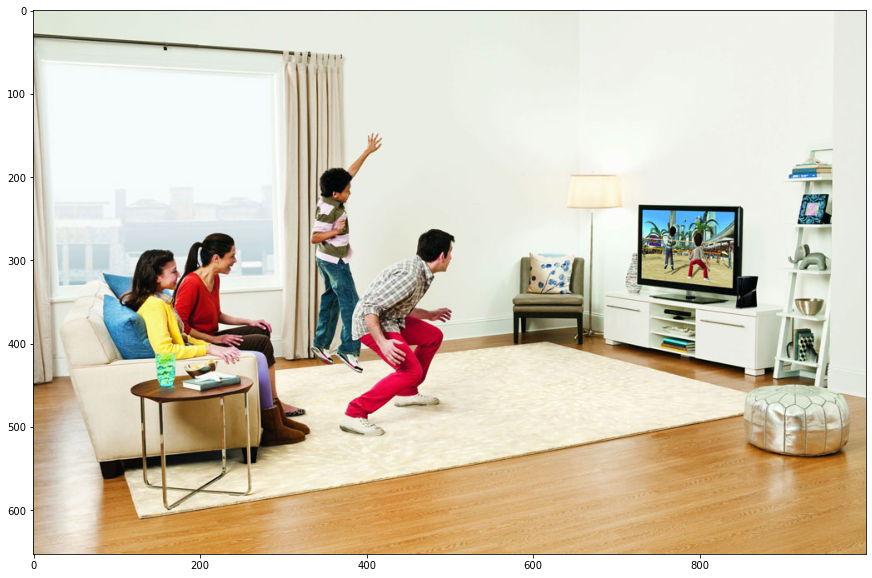

In [196]:
plt.figure(figsize=(15,10))
rgb1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(rgb1)
plt.show()

In [197]:
#Detecting the objects from the image:
blob=cv2.dnn.blobFromImage(img1, 0.00392, (448, 448), (0, 0, 0), True, crop=False)

#Giving these blobs as inputs to the network:
net.setInput(blob)

# Perform forward propagation to compute the output by passing the names of the output layers as parameters:
outs=net.forward(output)

In [198]:
# Obtaining the labels,boxes and confidence of the objects in the image:

class_ids=[]
boxes=[]
confidences=[]

for out in outs:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        
        if confidence>0.4:
            
            # Co-ordinates of the box:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [199]:
# Performing Non Maximum Supression to avoid overlapping of the boxes holding the same object :

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.2,0.4)
indexes

array([[24],
       [12],
       [ 8],
       [21],
       [16],
       [ 6],
       [30]], dtype=int32)

In [200]:
# Building the Object Detector:

font=cv2.FONT_HERSHEY_COMPLEX_SMALL

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]]),round(confidences[i],3)
        color=colors[i]
        cv2.rectangle(img1,(x,y),(x+w,y+h),color,2)
        cv2.putText(img1,str(label),(x,y),font,1,color,thickness=2)
        
        print(label)

('sofa', 0.862)
('person', 0.986)
('tvmonitor', 0.994)
('chair', 0.931)
('person', 0.976)
('person', 0.999)
('cup', 0.465)


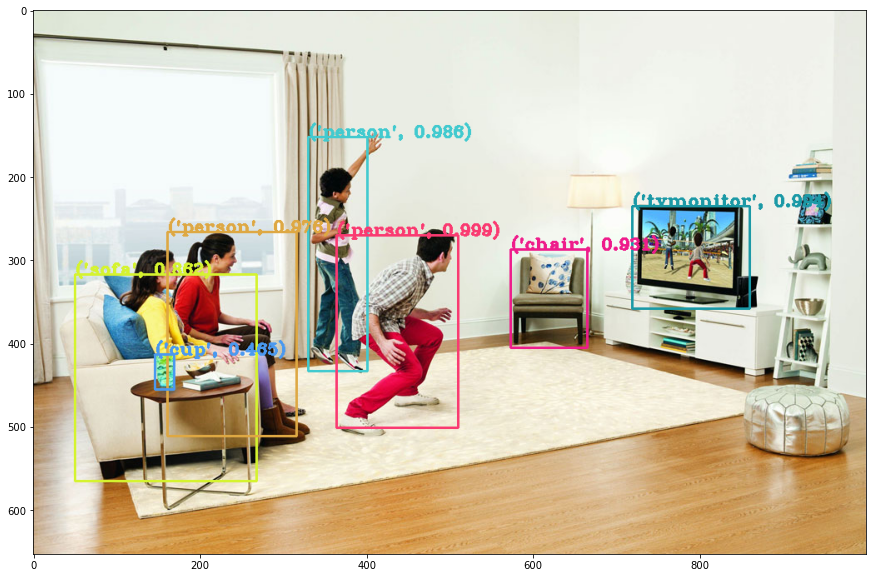

In [201]:
plt.figure(figsize=(15,10))
rgb1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(rgb1)
plt.show()

### Image 2:

#### Repeating all the steps above for another image:

In [216]:
# Loading an image:

img2=cv2.imread("img2.jpg")
height,width,channels=img2.shape
print("Height:",height)
print("Width:",width)
print("Channels:",channels)

Height: 768
Width: 768
Channels: 3


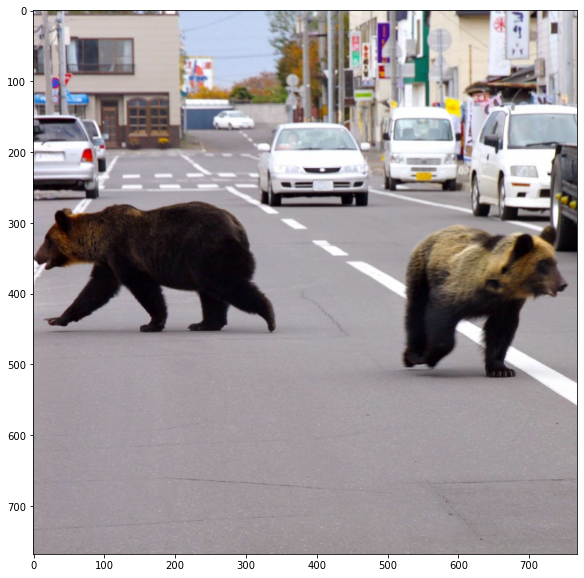

In [217]:
plt.figure(figsize=(15,10))
rgb2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(rgb2)
plt.show()

In [218]:
#Detecting the objects from the image:
blob=cv2.dnn.blobFromImage(img2, 0.00392, (448, 448), (0, 0, 0), True, crop=False)

#Giving these blobs as inputs to the network:
net.setInput(blob)

# Perform forward propagation to compute the output by passing the names of the output layers as parameters:
outs=net.forward(output)

# Obtaining the labels,boxes and confidence of the objects in the image:

class_ids=[]
boxes=[]
confidences=[]

for out in outs:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        
        if confidence>0.4:
            
            # Co-ordinates of the box:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Performing Non Maximum Supression to avoid overlapping of the boxes holding the same object :

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.2,0.1)

# Building the Object Detector:

font=cv2.FONT_HERSHEY_COMPLEX_SMALL

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]]),round(confidences[i],3)
        color=colors[i]
        cv2.rectangle(img2,(x,y),(x+w,y+h),color,2)
        cv2.putText(img2,str(label),(x,y),font,1,color,thickness=2)
        
        print(label)

('car', 0.98)
('car', 0.804)
('bear', 0.992)
('bear', 0.998)
('car', 0.99)
('car', 0.741)
('car', 0.988)


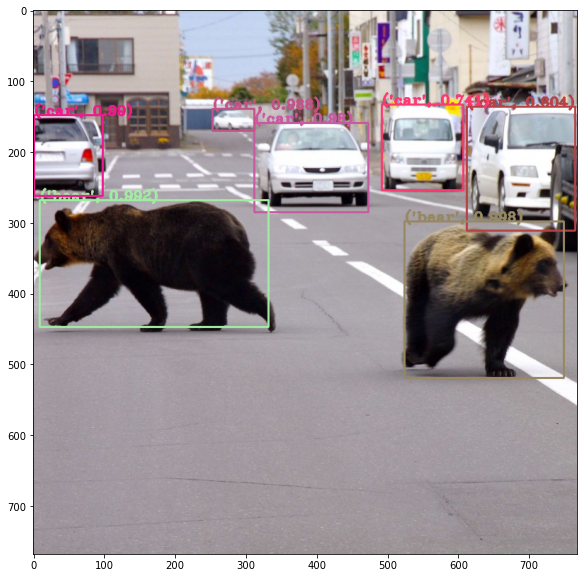

In [219]:
plt.figure(figsize=(15,10))
rgb2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(rgb2)
plt.show()